In [1]:
import io 
import numpy as np 
import random

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import re

# Import Dataset 

The dataset 'divina_commedia.txt' is imported, containing the text of Dante's Divine Comedy. The file includes additional lines that are not part of the original text but provide information about the author.

In [2]:
print('Opening file...')
path = "divina_commedia.txt"
with io.open(path, encoding='utf-8') as file:
    text = file.read().lower()

print("text length", len(text))
print()
print('\n\n\n\n\n', '***** first 1000 characters *****', '\n\n\n\n\n')
text[0:1000]

Opening file...
text length 558240






 ***** first 1000 characters ***** 







"inferno\n\n\n\ninferno: canto i\n\n\nnel mezzo del cammin di nostra vita\n  mi ritrovai per una selva oscura\n  che' la diritta via era smarrita.\n\nahi quanto a dir qual era e` cosa dura\n  esta selva selvaggia e aspra e forte\n  che nel pensier rinova la paura!\n\ntant'e` amara che poco e` piu` morte;\n  ma per trattar del ben ch'i' vi trovai,\n  diro` de l'altre cose ch'i' v'ho scorte.\n\nio non so ben ridir com'i' v'intrai,\n  tant'era pien di sonno a quel punto\n  che la verace via abbandonai.\n\nma poi ch'i' fui al pie` d'un colle giunto,\n  la` dove terminava quella valle\n  che m'avea di paura il cor compunto,\n\nguardai in alto, e vidi le sue spalle\n  vestite gia` de' raggi del pianeta\n  che mena dritto altrui per ogne calle.\n\nallor fu la paura un poco queta\n  che nel lago del cor m'era durata\n  la notte ch'i' passai con tanta pieta.\n\ne come quei che con lena affannata\n  uscito fuor del pelago a la riva\n  si volge a l'acqua perigliosa e guata,\n\ncosi` l'animo mio, 

In [3]:
# Remove information about the author
text = re.sub(r"(e-text courtesy progetto manuzio)", "", text, flags=re.DOTALL)

print("text length", len(text))
print()
print('\n\n\n\n\n', '***** first 1000 characters *****', '\n\n\n\n\n')
text[0:1000]

text length 558176






 ***** first 1000 characters ***** 







"inferno\n\n\n\ninferno: canto i\n\n\nnel mezzo del cammin di nostra vita\n  mi ritrovai per una selva oscura\n  che' la diritta via era smarrita.\n\nahi quanto a dir qual era e` cosa dura\n  esta selva selvaggia e aspra e forte\n  che nel pensier rinova la paura!\n\ntant'e` amara che poco e` piu` morte;\n  ma per trattar del ben ch'i' vi trovai,\n  diro` de l'altre cose ch'i' v'ho scorte.\n\nio non so ben ridir com'i' v'intrai,\n  tant'era pien di sonno a quel punto\n  che la verace via abbandonai.\n\nma poi ch'i' fui al pie` d'un colle giunto,\n  la` dove terminava quella valle\n  che m'avea di paura il cor compunto,\n\nguardai in alto, e vidi le sue spalle\n  vestite gia` de' raggi del pianeta\n  che mena dritto altrui per ogne calle.\n\nallor fu la paura un poco queta\n  che nel lago del cor m'era durata\n  la notte ch'i' passai con tanta pieta.\n\ne come quei che con lena affannata\n  uscito fuor del pelago a la riva\n  si volge a l'acqua perigliosa e guata,\n\ncosi` l'animo mio, 

# Preprocessing data

During the data preprocessing phase, the text is divided into individual cantos, removing unnecessary titles to retain only the 100 cantos from the Divine Comedy.

In [4]:
cantos = re.split(r'(?<=\n)(inferno|purgatorio|paradiso):\s*canto\s*[ivxlcdm]+\n*', text)

cantos = [canto.strip() for canto in cantos if canto.strip() and canto.lower() not in ['inferno', 'purgatorio', 'paradiso']]

# The first element of 'cantos', namely 'Inferno', is removed from the list to obtain a list containing only the cantos. 
if cantos[0].lower() in ['inferno', 'purgatorio', 'paradiso']:
    cantos = cantos[1:]

print(cantos)
print("Number of cantos: ", len(cantos))

# Print second canto
print(cantos[1]) 

["nel mezzo del cammin di nostra vita\n  mi ritrovai per una selva oscura\n  che' la diritta via era smarrita.\n\nahi quanto a dir qual era e` cosa dura\n  esta selva selvaggia e aspra e forte\n  che nel pensier rinova la paura!\n\ntant'e` amara che poco e` piu` morte;\n  ma per trattar del ben ch'i' vi trovai,\n  diro` de l'altre cose ch'i' v'ho scorte.\n\nio non so ben ridir com'i' v'intrai,\n  tant'era pien di sonno a quel punto\n  che la verace via abbandonai.\n\nma poi ch'i' fui al pie` d'un colle giunto,\n  la` dove terminava quella valle\n  che m'avea di paura il cor compunto,\n\nguardai in alto, e vidi le sue spalle\n  vestite gia` de' raggi del pianeta\n  che mena dritto altrui per ogne calle.\n\nallor fu la paura un poco queta\n  che nel lago del cor m'era durata\n  la notte ch'i' passai con tanta pieta.\n\ne come quei che con lena affannata\n  uscito fuor del pelago a la riva\n  si volge a l'acqua perigliosa e guata,\n\ncosi` l'animo mio, ch'ancor fuggiva,\n  si volse a retr

In [5]:
chars = sorted(list(set(text)))
print('total chars: ', len(chars))

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print(char_indices)
print(indices_char)

total chars:  40
{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, ',': 7, '-': 8, '.': 9, ':': 10, ';': 11, '<': 12, '>': 13, '?': 14, '`': 15, 'a': 16, 'b': 17, 'c': 18, 'd': 19, 'e': 20, 'f': 21, 'g': 22, 'h': 23, 'i': 24, 'j': 25, 'l': 26, 'm': 27, 'n': 28, 'o': 29, 'p': 30, 'q': 31, 'r': 32, 's': 33, 't': 34, 'u': 35, 'v': 36, 'x': 37, 'y': 38, 'z': 39}
{0: '\n', 1: ' ', 2: '!', 3: '"', 4: "'", 5: '(', 6: ')', 7: ',', 8: '-', 9: '.', 10: ':', 11: ';', 12: '<', 13: '>', 14: '?', 15: '`', 16: 'a', 17: 'b', 18: 'c', 19: 'd', 20: 'e', 21: 'f', 22: 'g', 23: 'h', 24: 'i', 25: 'j', 26: 'l', 27: 'm', 28: 'n', 29: 'o', 30: 'p', 31: 'q', 32: 'r', 33: 's', 34: 't', 35: 'u', 36: 'v', 37: 'x', 38: 'y', 39: 'z'}


# # Divide the sequence into training, validation and test

## Divide the sequence into training, validation and testing in an unbalanced way.

Si divide il dataset in training, validation e test andando a prendere in modo randomico i canti appena divisi. Al training si assegna il 70 percento dei canti, al validation il 20 e 10 per il test. 

Dato che i canti vengono mescolati all'inizo, questo potrebbe influire sui risultati per questo è stato definito che è un modo non bilanciato. 

Per questo primo addestramento è stata mantenuta l'architettura usata durante il laboratorio.  

In [6]:
random.shuffle(cantos)

train_size = int(0.7 * len(cantos))
val_size = int(0.2 * len(cantos))
test_size = len(cantos) - train_size - val_size

train_canti = cantos[:train_size]
val_canti = cantos[train_size:train_size + val_size]
test_canti = cantos[train_size + val_size:]

print(f"Training set: {len(train_canti)} cantos")
print(f"Validation set: {len(val_canti)} cantos")
print(f"Test set: {len(test_canti)} cantos")

Training set: 70 cantos
Validation set: 20 cantos
Test set: 10 cantos


In [7]:
maxlen = 30 # chunk length
step = 3

def preprocess_text(text, maxlen, step, chars, char_indices):
    sentences = []
    next_chars = []

    for i in range(0, len(text) - maxlen, step):
        sentences.append(text[i: i + maxlen])
        next_chars.append(text[i + maxlen])

    x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
    y = np.zeros((len(sentences), len(chars)), dtype=bool)

    for i, sentence in enumerate(sentences):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[next_chars[i]]] = 1

    return x, y

In [8]:
x_train, y_train = preprocess_text(''.join(train_canti), maxlen, step, chars, char_indices)
x_val, y_val = preprocess_text(''.join(val_canti), maxlen, step, chars, char_indices)
x_test, y_test = preprocess_text(''.join(test_canti), maxlen, step, chars, char_indices)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (129703, 30, 40)
y_train shape: (129703, 40)
x_val shape: (37081, 30, 40)
y_val shape: (37081, 40)
x_test shape: (18357, 30, 40)
y_test shape: (18357, 40)


Aggiungiamo all'architettura di rete anche la metrica di accuracy

In [9]:
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
    )
model.summary()

/Users/lucaperfetti/Desktop/università/Secondo Anno/Advanced ML/Assignement/Assignement-Advanced-ML/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,688 (358.16 KB)

 Trainable params: 91,688 (358.16 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import sys

def testAfterEpoch(epoch, _):
    print()
    print()
    print('***** Epoch: %d *****' % (epoch+1))
    start_index = random.randint(0, len(text)- maxlen - 1)

    generated = ''
    sentence = text[start_index : start_index + maxlen]
    generated = generated + sentence

    print('***** starting sentence *****') 
    print(sentence)
    print('*****************************')
    sys.stdout.write(generated)

    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1
        
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(preds)
        next_char = indices_char[next_index]

        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


In [11]:
print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [12]:
history = model.fit(x_train, y_train,
        validation_data=(x_val, y_val),
        batch_size = 2048, 
        epochs = 20, 
        #callbacks = [print_callback], 
        )

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 186ms/step - accuracy: 0.1617 - loss: 3.0542 - val_accuracy: 0.2833 - val_loss: 2.3635
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.3105 - loss: 2.2663 - val_accuracy: 0.3488 - val_loss: 2.0789
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.3624 - loss: 2.0232 - val_accuracy: 0.3836 - val_loss: 1.9249
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.3941 - loss: 1.9025 - val_accuracy: 0.4063 - val_loss: 1.8346
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.4249 - loss: 1.7970 - val_accuracy: 0.4170 - val_loss: 1.8080
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.4406 - loss: 1.7436 - val_accuracy: 0.4452 - val_loss: 1.7433
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.4602 - loss: 1.6834 - val_accuracy: 0.4428 - val_loss: 1.7295
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.4707 - loss: 1.6474 - val_accu

In [13]:
import matplotlib.pyplot as plt

def plot_performance(history):
    flg, ax = plt.subplots(1,2)
    flg.tight_layout()
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss')
    ax[0].plot(train_loss, label='Training Loss')
    ax[0].plot(val_loss, label='Validation Loss')
    ax[0].legend()
    
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].plot(train_acc, label='Training Accuracy')
    ax[1].plot(val_acc, label='Validation Accuracy')
    ax[1].legend()

    plt.show()

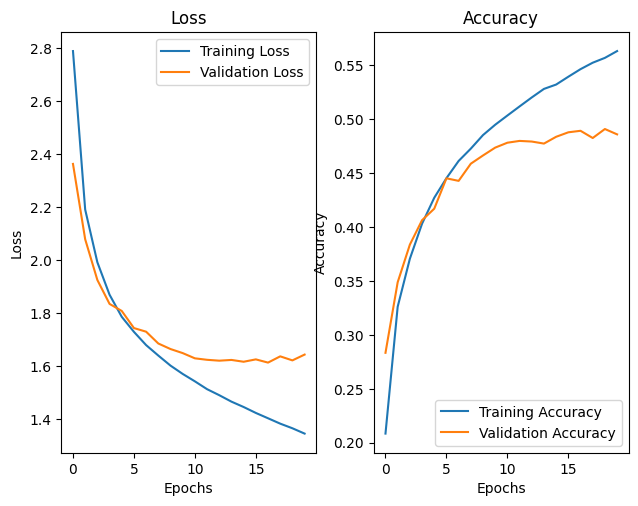

In [14]:
plot_performance(history)

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 1.6916807889938354
Test accuracy 0.47752901911735535


## Divide the sequence into training, validation and testing in an balanced way.

In [16]:
# Pre processing dei dati andando a dividere i canti

# Regex per separare i canti (inferno, purgatorio, paradiso, e numeri romani)
# Aggiungiamo un gruppo di cattura per separare i titoli di canto
cantiche = re.split(r'\n(inferno|purgatorio|paradiso)\n', text)

# Rimuoviamo gli eventuali vuoti dalla lista (risultati vuoti tra i titoli dei canti)
# Inoltre, rimuoviamo i titoli di canto non necessari
cantiche = [canto.strip() for canto in cantiche if canto.strip() and canto.lower() not in ['inferno', 'purgatorio', 'paradiso']]

print(cantiche)
print(len(cantiche))
print(cantiche[1])

['inferno\n\n\n\ninferno: canto i\n\n\nnel mezzo del cammin di nostra vita\n  mi ritrovai per una selva oscura\n  che\' la diritta via era smarrita.\n\nahi quanto a dir qual era e` cosa dura\n  esta selva selvaggia e aspra e forte\n  che nel pensier rinova la paura!\n\ntant\'e` amara che poco e` piu` morte;\n  ma per trattar del ben ch\'i\' vi trovai,\n  diro` de l\'altre cose ch\'i\' v\'ho scorte.\n\nio non so ben ridir com\'i\' v\'intrai,\n  tant\'era pien di sonno a quel punto\n  che la verace via abbandonai.\n\nma poi ch\'i\' fui al pie` d\'un colle giunto,\n  la` dove terminava quella valle\n  che m\'avea di paura il cor compunto,\n\nguardai in alto, e vidi le sue spalle\n  vestite gia` de\' raggi del pianeta\n  che mena dritto altrui per ogne calle.\n\nallor fu la paura un poco queta\n  che nel lago del cor m\'era durata\n  la notte ch\'i\' passai con tanta pieta.\n\ne come quei che con lena affannata\n  uscito fuor del pelago a la riva\n  si volge a l\'acqua perigliosa e guata,\

In [17]:
# INFERNO
canti_inferno = re.split(r'(?<=\n)(inferno):\s*canto\s*[ivxlcdm]+\n*', cantiche[0])

canti_inferno = [canto.strip() for canto in canti_inferno if canto.strip() and canto.lower() not in ['inferno']]

# The first element of 'cantos', namely 'Inferno', is removed from the list to obtain a list containing only the cantos. 
if canti_inferno[0].lower() in ['inferno', 'purgatorio', 'paradiso']:
    canti_inferno = canti_inferno[1:]

print("Number of cantos: ", len(canti_inferno))

train_size_inferno = int(0.7 * len(canti_inferno))
val_size_inferno = int(0.2 * len(canti_inferno))
test_size_inferno = len(canti_inferno) - train_size_inferno - val_size_inferno

train_inferno = canti_inferno[:train_size_inferno]
val_inferno = canti_inferno[train_size_inferno:train_size_inferno + val_size_inferno]
test_inferno = canti_inferno[train_size_inferno + val_size_inferno:]

print(f"Training set: {len(train_inferno)} cantos")
print(f"Validation set: {len(val_inferno)} cantos")
print(f"Test set: {len(test_inferno)} cantos")

Number of cantos:  34
Training set: 23 cantos
Validation set: 6 cantos
Test set: 5 cantos


In [18]:
# PURGATORIO
canti_purgatorio = re.split(r'(?<=\n)(purgatorio):\s*canto\s*[ivxlcdm]+\n*', cantiche[1])

canti_purgatorio = [canto.strip() for canto in canti_purgatorio if canto.strip() and canto.lower() not in ['purgatorio']]

# The first element of 'cantos', namely 'Inferno', is removed from the list to obtain a list containing only the cantos. 
if canti_purgatorio[0].lower() in ['purgatorio']:
    canti_purgatorio = canti_purgatorio[1:]

print("Number of cantos: ", len(canti_purgatorio))

train_size_purgatorio = int(0.7 * len(canti_purgatorio))
val_size_purgatorio = int(0.2 * len(canti_purgatorio))
test_size_purgatorio = len(canti_purgatorio) - train_size_purgatorio - val_size_purgatorio

train_purgatorio = canti_purgatorio[:train_size_purgatorio]
val_purgatorio = canti_purgatorio[train_size_purgatorio:train_size_purgatorio + val_size_purgatorio]
test_purgatorio = canti_purgatorio[train_size_purgatorio + val_size_purgatorio:]

print(f"Training set: {len(train_purgatorio)} cantos")
print(f"Validation set: {len(val_purgatorio)} cantos")
print(f"Test set: {len(test_purgatorio)} cantos")

Number of cantos:  33
Training set: 23 cantos
Validation set: 6 cantos
Test set: 4 cantos


In [19]:
# PARADISO
canti_paradiso = re.split(r'(?<=\n)(paradiso):\s*canto\s*[ivxlcdm]+\n*', cantiche[2])

canti_paradiso = [canto.strip() for canto in canti_paradiso if canto.strip() and canto.lower() not in ['paradiso']]

# The first element of 'cantos', namely 'Inferno', is removed from the list to obtain a list containing only the cantos. 
if canti_paradiso[0].lower() in ['paradiso']:
    canti_paradiso = canti_paradiso[1:]

print("Number of cantos: ", len(canti_paradiso))

train_size_paradiso = int(0.7 * len(canti_paradiso))
val_size_paradiso = int(0.2 * len(canti_paradiso))
test_size_paradiso = len(canti_paradiso) - train_size_paradiso - val_size_paradiso

train_paradiso = canti_paradiso[:train_size_paradiso]
val_paradiso = canti_paradiso[train_size_paradiso:train_size_paradiso + val_size_paradiso]
test_paradiso = canti_paradiso[train_size_paradiso + val_size_paradiso:]

print(f"Training set: {len(train_paradiso)} cantos")
print(f"Validation set: {len(val_paradiso)} cantos")
print(f"Test set: {len(test_paradiso)} cantos")

Number of cantos:  33
Training set: 23 cantos
Validation set: 6 cantos
Test set: 4 cantos


In [20]:
# Uniamo i canti suddivisi per ciascuna cantica nei rispettivi set finali
train_canti = train_inferno + train_purgatorio + train_paradiso
val_canti = val_inferno + val_purgatorio + val_paradiso
test_canti = test_inferno + test_purgatorio + test_paradiso

# Stampa la lunghezza dei set
print(f"Training set: {len(train_canti)} cantos")
print(f"Validation set: {len(val_canti)} cantos")
print(f"Test set: {len(test_canti)} cantos")

Training set: 69 cantos
Validation set: 18 cantos
Test set: 13 cantos


In [21]:
x_train, y_train = preprocess_text(''.join(train_canti), maxlen, step, chars, char_indices)
x_val, y_val = preprocess_text(''.join(val_canti), maxlen, step, chars, char_indices)
x_test, y_test = preprocess_text(''.join(test_canti), maxlen, step, chars, char_indices)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (126347, 30, 40)
y_train shape: (126347, 40)
x_val shape: (33989, 30, 40)
y_val shape: (33989, 40)
x_test shape: (24811, 30, 40)
y_test shape: (24811, 40)


In [22]:
model_b = Sequential()
model_b.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_b.add(Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model_b.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
    )
model_b.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,688 (358.16 KB)

 Trainable params: 91,688 (358.16 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [24]:
history_b = model_b.fit(x_train, y_train,
        validation_data=(x_val, y_val),
        batch_size = 2048, 
        epochs = 20, 
        #callbacks = [print_callback], 
        )

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.1725 - loss: 3.0601 - val_accuracy: 0.3010 - val_loss: 2.3509
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.3084 - loss: 2.2753 - val_accuracy: 0.3514 - val_loss: 2.0774
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.3576 - loss: 2.0385 - val_accuracy: 0.3671 - val_loss: 2.0129
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.3905 - loss: 1.9173 - val_accuracy: 0.4077 - val_loss: 1.8625
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.4203 - loss: 1.8094 - val_accuracy: 0.4167 - val_loss: 1.8092
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - accuracy: 0.4341 - loss: 1.7543 - val_accuracy: 0.4341 - val_loss: 1.7643
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.4545 - loss: 1.7001 - val_accuracy: 0.4494 - val_loss: 1.7187
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.4655 - loss: 1.6613 - val_accu

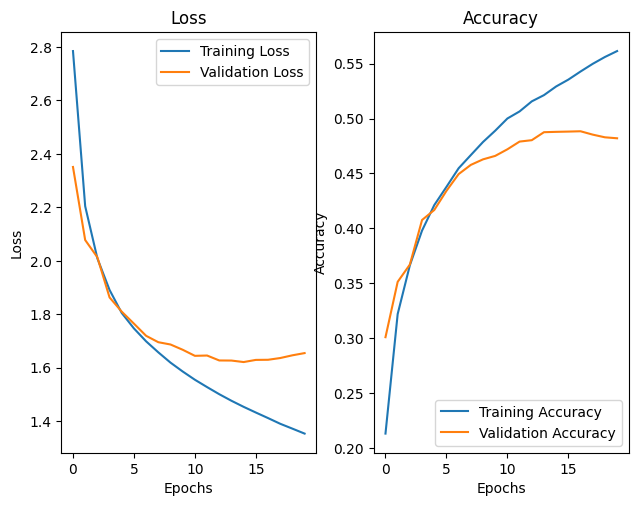

In [25]:
plot_performance(history_b)

In [26]:
score = model_b.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 1.639420747756958
Test accuracy 0.48970213532447815


# Tune the chunk length

## maxlen 40

In [27]:
maxlen = 40 # chunk length
step = 3

x_train_max_40, y_train_max_40 = preprocess_text(''.join(train_canti), maxlen, step, chars, char_indices)
x_val_max_40, y_val_max_40 = preprocess_text(''.join(val_canti), maxlen, step, chars, char_indices)
x_test_max_40, y_test_max_40 = preprocess_text(''.join(test_canti), maxlen, step, chars, char_indices)

print(f"x_train shape: {x_train_max_40.shape}")
print(f"y_train shape: {y_train_max_40.shape}")
print(f"x_val shape: {x_val_max_40.shape}")
print(f"y_val shape: {y_val_max_40.shape}")
print(f"x_test shape: {x_test_max_40.shape}")
print(f"y_test shape: {y_test_max_40.shape}")

x_train shape: (126344, 40, 40)
y_train shape: (126344, 40)
x_val shape: (33985, 40, 40)
y_val shape: (33985, 40)
x_test shape: (24808, 40, 40)
y_test shape: (24808, 40)


In [28]:
model_max_40 = Sequential()
model_max_40.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_max_40.add(Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model_max_40.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
    )
model_max_40.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,688 (358.16 KB)

 Trainable params: 91,688 (358.16 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [31]:
history_max_40 = model_max_40.fit(x_train_max_40, y_train_max_40,
        validation_data=(x_val_max_40, y_val_max_40),
        batch_size = 2048, 
        epochs = 20, 
        #callbacks = [print_callback], 
        )

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 251ms/step - accuracy: 0.1728 - loss: 3.0470 - val_accuracy: 0.2591 - val_loss: 2.3991
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 261ms/step - accuracy: 0.3113 - loss: 2.2462 - val_accuracy: 0.3540 - val_loss: 2.0481
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 261ms/step - accuracy: 0.3641 - loss: 2.0150 - val_accuracy: 0.3839 - val_loss: 1.9348
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 254ms/step - accuracy: 0.3968 - loss: 1.8972 - val_accuracy: 0.4097 - val_loss: 1.8378
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.4229 - loss: 1.8028 - val_accuracy: 0.4315 - val_loss: 1.7706
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.4469 - loss: 1.7273 - val_accuracy: 0.4494 - val_loss: 1.7231
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.4641 - loss: 1.6684 - val_accuracy: 0.4549 - val_loss: 1.7009
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.4779 - loss: 1.6243 - val_accu

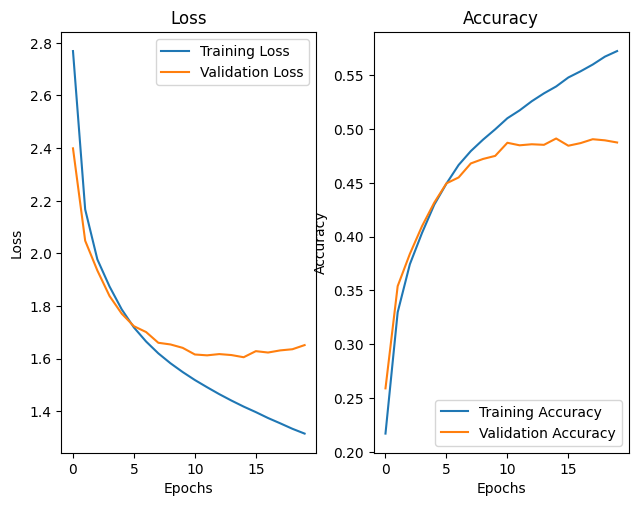

In [32]:
plot_performance(history_max_40)

In [33]:
score = model_max_40.evaluate(x_test_max_40, y_test_max_40, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 1.668627381324768
Test accuracy 0.48395678400993347


## maxlen 80

In [34]:
maxlen = 80 # chunk length
step = 3

x_train_max_80, y_train_max_80 = preprocess_text(''.join(train_canti), maxlen, step, chars, char_indices)
x_val_max_80, y_val_max_80 = preprocess_text(''.join(val_canti), maxlen, step, chars, char_indices)
x_test_max_80, y_test_max_80 = preprocess_text(''.join(test_canti), maxlen, step, chars, char_indices)

print(f"x_train shape: {x_train_max_80.shape}")
print(f"y_train shape: {y_train_max_80.shape}")
print(f"x_val shape: {x_val_max_80.shape}")
print(f"y_val shape: {y_val_max_80.shape}")
print(f"x_test shape: {x_test_max_80.shape}")
print(f"y_test shape: {y_test_max_80.shape}")

x_train shape: (126331, 80, 40)
y_train shape: (126331, 40)
x_val shape: (33972, 80, 40)
y_val shape: (33972, 40)
x_test shape: (24794, 80, 40)
y_test shape: (24794, 40)


In [35]:
model_max_80 = Sequential()
model_max_80.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_max_80.add(Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model_max_80.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
    )
model_max_80.summary()

/Users/lucaperfetti/Desktop/università/Secondo Anno/Advanced ML/Assignement/Assignement-Advanced-ML/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,688 (358.16 KB)

 Trainable params: 91,688 (358.16 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [38]:
history_max_80 = model_max_80.fit(x_train_max_80, y_train_max_80,
        validation_data=(x_val_max_80, y_val_max_80),
        batch_size = 2048, 
        epochs = 20, 
        #callbacks = [print_callback], 
        )

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 460ms/step - accuracy: 0.1664 - loss: 3.0922 - val_accuracy: 0.2744 - val_loss: 2.4190
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 467ms/step - accuracy: 0.2996 - loss: 2.3039 - val_accuracy: 0.3388 - val_loss: 2.1116
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 472ms/step - accuracy: 0.3571 - loss: 2.0542 - val_accuracy: 0.3785 - val_loss: 1.9592
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 474ms/step - accuracy: 0.3862 - loss: 1.9368 - val_accuracy: 0.3739 - val_loss: 1.9334
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 475ms/step - accuracy: 0.4096 - loss: 1.8443 - val_accuracy: 0.4018 - val_loss: 1.8635
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 472ms/step - accuracy: 0.4296 - loss: 1.7832 - val_accuracy: 0.4394 - val_loss: 1.7621
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 472ms/step - accuracy: 0.4430 - loss: 1.7283 - val_accuracy: 0.4492 - val_loss: 1.7191
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 29s 475ms/step - accuracy: 0.4594 - loss: 1.6835 - val_accu

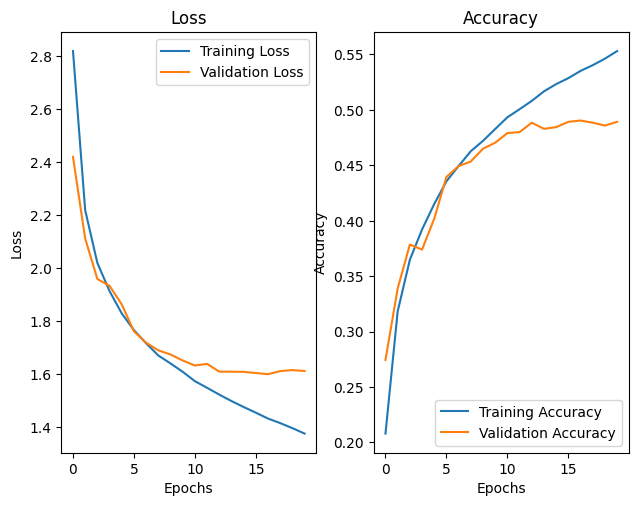

In [39]:
plot_performance(history_max_80)

In [40]:
score = model_max_80.evaluate(x_test_max_80, y_test_max_80, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 1.6320291757583618
Test accuracy 0.48531901836395264


## maxlen 80 step 8

In [41]:
maxlen = 80 # chunk length
step = 8

x_train_max_80s, y_train_max_80s = preprocess_text(''.join(train_canti), maxlen, step, chars, char_indices)
x_val_max_80s, y_val_max_80s = preprocess_text(''.join(val_canti), maxlen, step, chars, char_indices)
x_test_max_80s, y_test_max_80s = preprocess_text(''.join(test_canti), maxlen, step, chars, char_indices)

print(f"x_train shape: {x_train_max_80s.shape}")
print(f"y_train shape: {y_train_max_80s.shape}")
print(f"x_val shape: {x_val_max_80s.shape}")
print(f"y_val shape: {y_val_max_80s.shape}")
print(f"x_test shape: {x_test_max_80s.shape}")
print(f"y_test shape: {y_test_max_80s.shape}")

x_train shape: (47374, 80, 40)
y_train shape: (47374, 40)
x_val shape: (12740, 80, 40)
y_val shape: (12740, 40)
x_test shape: (9298, 80, 40)
y_test shape: (9298, 40)


In [42]:
model_max_80s = Sequential()
model_max_80s.add(LSTM(128, input_shape=(maxlen, len(chars))))
model_max_80s.add(Dense(len(chars), activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model_max_80s.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer,
    metrics=['accuracy']
    )
model_max_80s.summary()

/Users/lucaperfetti/Desktop/università/Secondo Anno/Advanced ML/Assignement/Assignement-Advanced-ML/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,688 (358.16 KB)

 Trainable params: 91,688 (358.16 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [44]:
history_max_80s = model_max_80s.fit(x_train_max_80s, y_train_max_80s,
        validation_data=(x_val_max_80s, y_val_max_80s),
        batch_size = 2048, 
        epochs = 20, 
        #callbacks = [print_callback], 
        )

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 455ms/step - accuracy: 0.1318 - loss: 3.2334 - val_accuracy: 0.1864 - val_loss: 2.9500
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 460ms/step - accuracy: 0.2002 - loss: 2.8183 - val_accuracy: 0.2166 - val_loss: 2.6674
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 458ms/step - accuracy: 0.2711 - loss: 2.4819 - val_accuracy: 0.2889 - val_loss: 2.3609
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 463ms/step - accuracy: 0.3097 - loss: 2.2806 - val_accuracy: 0.3024 - val_loss: 2.2246
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 461ms/step - accuracy: 0.3305 - loss: 2.1592 - val_accuracy: 0.3482 - val_loss: 2.1271
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 454ms/step - accuracy: 0.3496 - loss: 2.0838 - val_accuracy: 0.3356 - val_loss: 2.1133
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 455ms/step - accuracy: 0.3595 - loss: 2.0359 - val_accuracy: 0.3418 - val_loss: 2.0622
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 452ms/step - accuracy: 0.3711 - loss: 1.9801 - val_accu

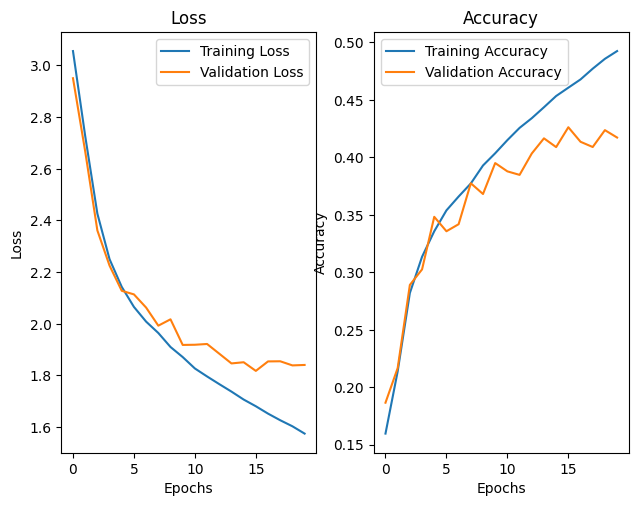

In [45]:
plot_performance(history_max_80s)

In [46]:
score = model_max_80s.evaluate(x_test_max_80s, y_test_max_80s, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 1.835488200187683
Test accuracy 0.4183695316314697
